In [1]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
local_device_protos

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12857567630279093400, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17708598647331465747
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4587953700989265232
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16101349786
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6721223103826146805
 physical_device_desc: "device: 0, name: Quadro P5000, pci bus id: 0000:00:05.0, compute capability: 6.1"]

In [2]:
import tensorflow as tf
print('Eager Execution On ->', tf.executing_eagerly())
print('Tensorflow Version ->', tf.__version__)

Eager Execution On -> True
Tensorflow Version -> 2.0.0


In [3]:
from config import *
from src.utils import *
from src.dataset import *
from src.models import *
from src.losses import *
from src.training import *

In [4]:
path = download_existing_dataset(EXISTING_DATASETS['maps'], 'maps')
print('Dataset Path ->', path)

Dataset Path -> /root/.keras/datasets/maps


In [5]:
!mv /root/.keras/datasets/maps/val /root/.keras/datasets/maps/test
!ls /root/.keras/datasets/maps

test  train


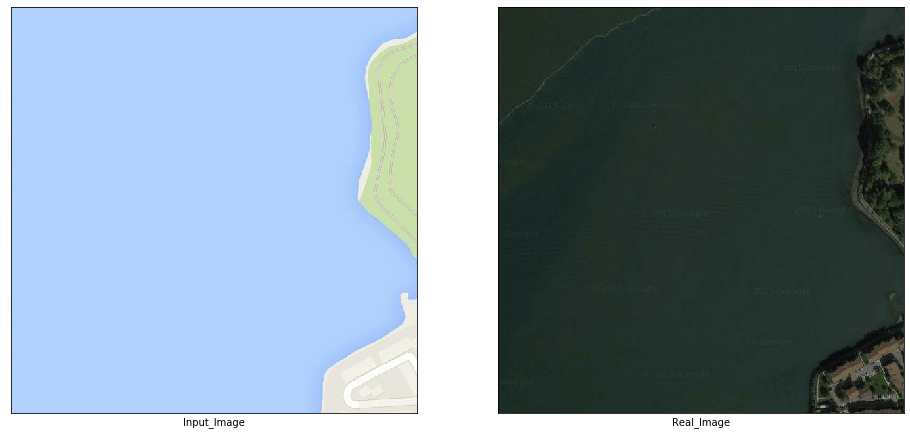

In [5]:
visualize(join(path, 'train/200.jpg'))

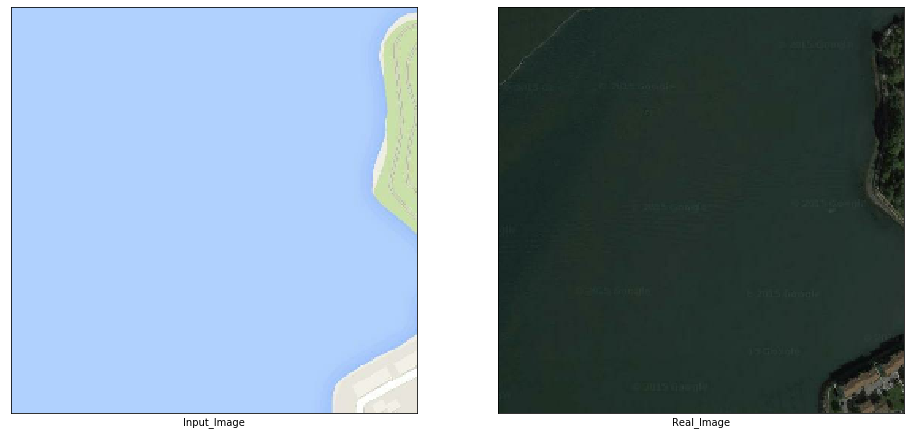

In [6]:
visualize(join(path, 'train/200.jpg'), augment=True)

In [7]:
train_dataset, test_dataset = get_datasets(path)
print(train_dataset)
print(test_dataset)

<DatasetV1Adapter shapes: ((None, 256, 256, 3), (None, 256, 256, 3)), types: (tf.float32, tf.float32)>
<DatasetV1Adapter shapes: ((None, 256, 256, None), (None, 256, 256, None)), types: (tf.float32, tf.float32)>


In [8]:
generator = Generator()
generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, None, None, 6 3072        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, None, None, 1 131584      sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, None, None, 2 525312      sequential_1[0][0]               
______________________________________________________________________________________________

In [9]:
discriminator = Discriminator()
discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        [(None, None, None,  0                                            
__________________________________________________________________________________________________
target_image (InputLayer)       [(None, None, None,  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, None, None, 6 0           input_image[0][0]                
                                                                 target_image[0][0]               
__________________________________________________________________________________________________
sequential_15 (Sequential)      (None, None, None, 6 6144        concatenate_1[0][0]        

In [10]:
discriminator_optimizer, generator_optimizer = get_optimizers()
checkpoint, checkpoint_prefix = get_checkpoint(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer
)

0it [00:00, ?it/s]

Epoch 1 going on....


1096it [01:49,  9.98it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 1 is 109.78147029876709 sec

Epoch 2 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 2 is 103.50709843635559 sec

Epoch 3 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 3 is 103.53959202766418 sec

Epoch 4 going on....


1096it [01:43, 10.60it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 4 is 103.42470264434814 sec

Epoch 5 going on....


1096it [01:43, 10.60it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 5 is 103.42814826965332 sec

Epoch 6 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 6 is 103.47937941551208 sec

Epoch 7 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 7 is 103.47487449645996 sec

Epoch 8 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 8 is 103.45298314094543 sec

Epoch 9 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 9 is 103.5201370716095 sec

Epoch 10 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 10 is 103.50247573852539 sec

Epoch 11 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 11 is 103.48322868347168 sec

Epoch 12 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 12 is 103.48778223991394 sec

Epoch 13 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 13 is 103.45634126663208 sec

Epoch 14 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 14 is 103.47680377960205 sec

Epoch 15 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 15 is 103.46662950515747 sec

Epoch 16 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 16 is 103.46334648132324 sec

Epoch 17 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 17 is 103.45729517936707 sec

Epoch 18 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 18 is 103.50671935081482 sec

Epoch 19 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 19 is 103.50799751281738 sec

Epoch 20 going on....


1096it [01:43, 10.59it/s]


Completed.


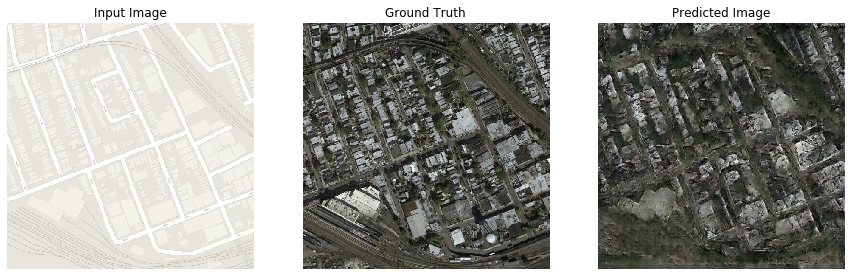

0it [00:00, ?it/s]

Time taken for epoch 20 is 105.24544072151184 sec

Epoch 21 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 21 is 103.53171014785767 sec

Epoch 22 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 22 is 103.54918479919434 sec

Epoch 23 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 23 is 103.56745886802673 sec

Epoch 24 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 24 is 103.47834396362305 sec

Epoch 25 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 25 is 103.47924494743347 sec

Epoch 26 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 26 is 103.52175855636597 sec

Epoch 27 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 27 is 103.5153546333313 sec

Epoch 28 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 28 is 103.4939489364624 sec

Epoch 29 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 29 is 103.48379898071289 sec

Epoch 30 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 30 is 103.49881863594055 sec

Epoch 31 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 31 is 103.50595188140869 sec

Epoch 32 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 32 is 103.53141045570374 sec

Epoch 33 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 33 is 103.52916646003723 sec

Epoch 34 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 34 is 103.48560929298401 sec

Epoch 35 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 35 is 103.48106694221497 sec

Epoch 36 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 36 is 103.51468133926392 sec

Epoch 37 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 37 is 103.47286581993103 sec

Epoch 38 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 38 is 103.50020337104797 sec

Epoch 39 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 39 is 103.51065754890442 sec

Epoch 40 going on....


1096it [01:43, 10.59it/s]


Completed.


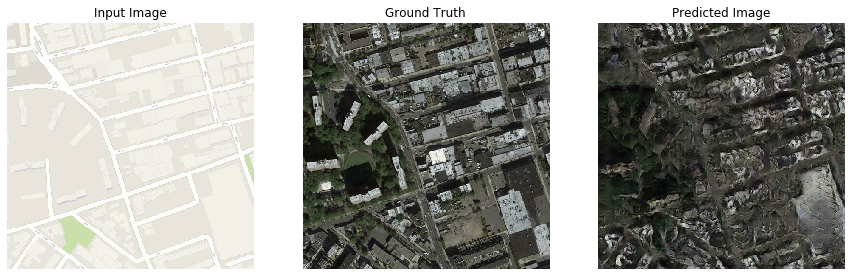

0it [00:00, ?it/s]

Time taken for epoch 40 is 105.2992913722992 sec

Epoch 41 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 41 is 103.48128747940063 sec

Epoch 42 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 42 is 103.48434042930603 sec

Epoch 43 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 43 is 103.48480868339539 sec

Epoch 44 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 44 is 103.46298885345459 sec

Epoch 45 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 45 is 103.48951601982117 sec

Epoch 46 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 46 is 103.47328662872314 sec

Epoch 47 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 47 is 103.51872754096985 sec

Epoch 48 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 48 is 103.50674414634705 sec

Epoch 49 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 49 is 103.47943353652954 sec

Epoch 50 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 50 is 103.50573897361755 sec

Epoch 51 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 51 is 103.48632764816284 sec

Epoch 52 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 52 is 103.51111197471619 sec

Epoch 53 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 53 is 103.53645396232605 sec

Epoch 54 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 54 is 103.5344660282135 sec

Epoch 55 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 55 is 103.51360130310059 sec

Epoch 56 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 56 is 103.53512787818909 sec

Epoch 57 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 57 is 103.53361940383911 sec

Epoch 58 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 58 is 103.5146164894104 sec

Epoch 59 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 59 is 103.53762936592102 sec

Epoch 60 going on....


1096it [01:43, 10.59it/s]


Completed.


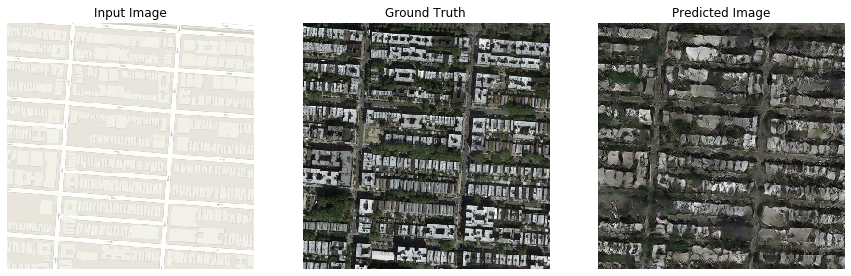

0it [00:00, ?it/s]

Time taken for epoch 60 is 105.26494073867798 sec

Epoch 61 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 61 is 103.52729320526123 sec

Epoch 62 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 62 is 103.53331089019775 sec

Epoch 63 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 63 is 103.54902577400208 sec

Epoch 64 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 64 is 103.57093572616577 sec

Epoch 65 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 65 is 103.51522302627563 sec

Epoch 66 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 66 is 103.55593347549438 sec

Epoch 67 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 67 is 103.52129864692688 sec

Epoch 68 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 68 is 103.57087421417236 sec

Epoch 69 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 69 is 103.58007669448853 sec

Epoch 70 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 70 is 103.55266737937927 sec

Epoch 71 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 71 is 103.5937430858612 sec

Epoch 72 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 72 is 103.51794481277466 sec

Epoch 73 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 73 is 103.57369589805603 sec

Epoch 74 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 74 is 103.51807737350464 sec

Epoch 75 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 75 is 103.51519131660461 sec

Epoch 76 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 76 is 103.59235286712646 sec

Epoch 77 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 77 is 103.56659388542175 sec

Epoch 78 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 78 is 103.55547094345093 sec

Epoch 79 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 79 is 103.52623438835144 sec

Epoch 80 going on....


1096it [01:43, 10.58it/s]


Completed.


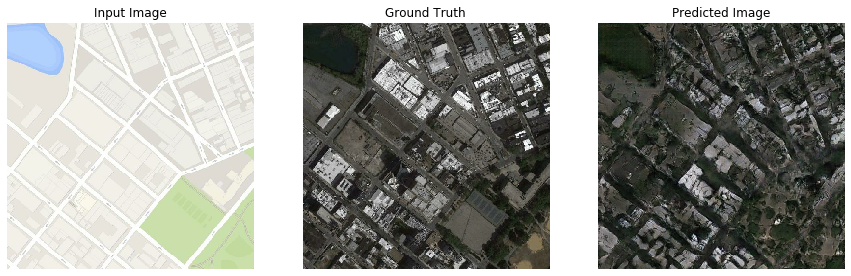

0it [00:00, ?it/s]

Time taken for epoch 80 is 105.30647134780884 sec

Epoch 81 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 81 is 103.59439659118652 sec

Epoch 82 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 82 is 103.59201335906982 sec

Epoch 83 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 83 is 103.5659818649292 sec

Epoch 84 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 84 is 103.56862807273865 sec

Epoch 85 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 85 is 103.5851731300354 sec

Epoch 86 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 86 is 103.58657956123352 sec

Epoch 87 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 87 is 103.54093813896179 sec

Epoch 88 going on....


1096it [01:43, 10.59it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 88 is 103.51898527145386 sec

Epoch 89 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 89 is 103.58558773994446 sec

Epoch 90 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 90 is 103.57168245315552 sec

Epoch 91 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 91 is 103.57216286659241 sec

Epoch 92 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 92 is 103.5806839466095 sec

Epoch 93 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 93 is 103.59213423728943 sec

Epoch 94 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 94 is 103.6079728603363 sec

Epoch 95 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 95 is 103.6135151386261 sec

Epoch 96 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 96 is 103.64617657661438 sec

Epoch 97 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 97 is 103.68186020851135 sec

Epoch 98 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 98 is 103.63655710220337 sec

Epoch 99 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 99 is 103.63472151756287 sec

Epoch 100 going on....


1096it [01:43, 10.57it/s]


Completed.


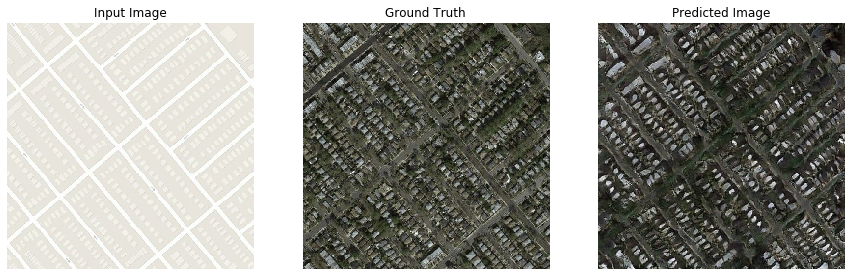

0it [00:00, ?it/s]

Time taken for epoch 100 is 105.44992971420288 sec

Epoch 101 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 101 is 103.62880301475525 sec

Epoch 102 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 102 is 103.66471982002258 sec

Epoch 103 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 103 is 103.64811491966248 sec

Epoch 104 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 104 is 103.60917091369629 sec

Epoch 105 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 105 is 103.65067601203918 sec

Epoch 106 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 106 is 103.65168714523315 sec

Epoch 107 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 107 is 103.62415790557861 sec

Epoch 108 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 108 is 103.65272831916809 sec

Epoch 109 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 109 is 103.61151647567749 sec

Epoch 110 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 110 is 103.63238787651062 sec

Epoch 111 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 111 is 103.68630862236023 sec

Epoch 112 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 112 is 103.6160933971405 sec

Epoch 113 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 113 is 103.6466896533966 sec

Epoch 114 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 114 is 103.64254069328308 sec

Epoch 115 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 115 is 103.67233180999756 sec

Epoch 116 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 116 is 103.64328074455261 sec

Epoch 117 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 117 is 103.66109728813171 sec

Epoch 118 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 118 is 103.69784951210022 sec

Epoch 119 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 119 is 103.63371801376343 sec

Epoch 120 going on....


1096it [01:43, 10.57it/s]


Completed.


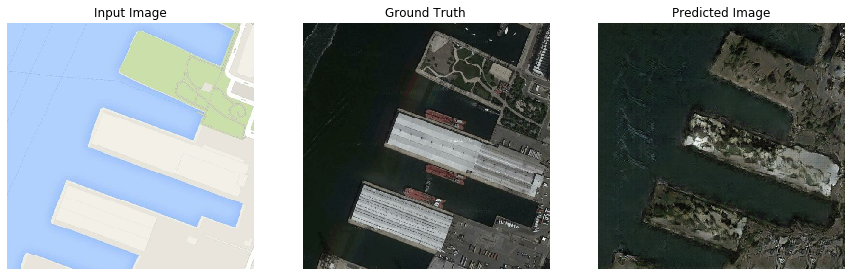

0it [00:00, ?it/s]

Time taken for epoch 120 is 105.3715500831604 sec

Epoch 121 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 121 is 103.6470775604248 sec

Epoch 122 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 122 is 103.61427307128906 sec

Epoch 123 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 123 is 103.65953040122986 sec

Epoch 124 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 124 is 103.72352194786072 sec

Epoch 125 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 125 is 103.6589629650116 sec

Epoch 126 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 126 is 103.62665152549744 sec

Epoch 127 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 127 is 103.73708748817444 sec

Epoch 128 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 128 is 103.75953602790833 sec

Epoch 129 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 129 is 103.77960896492004 sec

Epoch 130 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 130 is 103.75113224983215 sec

Epoch 131 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 131 is 103.76814031600952 sec

Epoch 132 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 132 is 103.7596435546875 sec

Epoch 133 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 133 is 103.80079650878906 sec

Epoch 134 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 134 is 103.72706055641174 sec

Epoch 135 going on....


1096it [01:43, 10.56it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 135 is 103.74391198158264 sec

Epoch 136 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 136 is 103.63086247444153 sec

Epoch 137 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 137 is 103.70520067214966 sec

Epoch 138 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 138 is 103.67953419685364 sec

Epoch 139 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 139 is 103.6820068359375 sec

Epoch 140 going on....


1096it [01:43, 10.57it/s]


Completed.


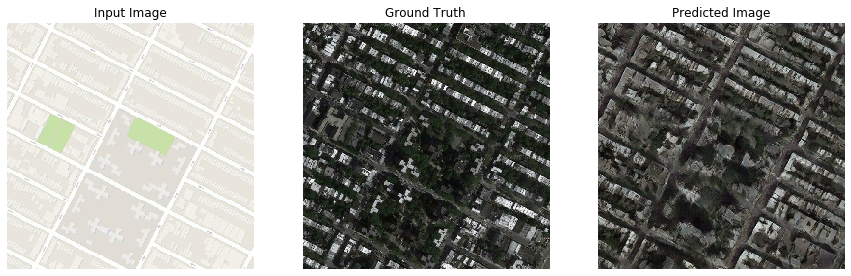

0it [00:00, ?it/s]

Time taken for epoch 140 is 105.50987505912781 sec

Epoch 141 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 141 is 103.68925189971924 sec

Epoch 142 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 142 is 103.65571570396423 sec

Epoch 143 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 143 is 103.66591334342957 sec

Epoch 144 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 144 is 103.69216847419739 sec

Epoch 145 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 145 is 103.67982387542725 sec

Epoch 146 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 146 is 103.63467288017273 sec

Epoch 147 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 147 is 103.67704653739929 sec

Epoch 148 going on....


1096it [01:43, 10.58it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 148 is 103.63194680213928 sec

Epoch 149 going on....


1096it [01:43, 10.57it/s]
0it [00:00, ?it/s]

Completed.
Time taken for epoch 149 is 103.66913986206055 sec

Epoch 150 going on....


1096it [01:43, 10.57it/s]

Completed.
Time taken for epoch 150 is 103.65142774581909 sec



In [11]:
generator_loss_history, discriminator_loss_history = train(
    discriminator, generator,
    discriminator_optimizer,
    generator_optimizer,
    train_dataset, test_dataset,
    checkpoint, checkpoint_prefix
)

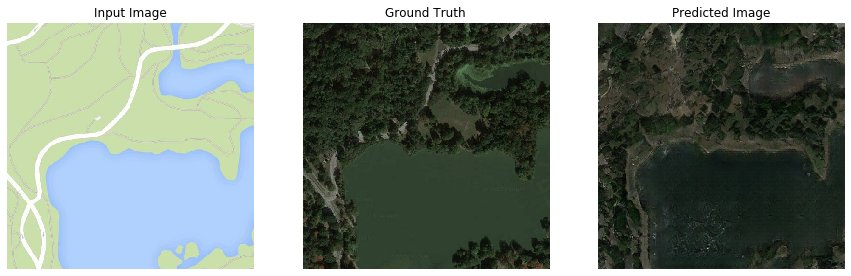

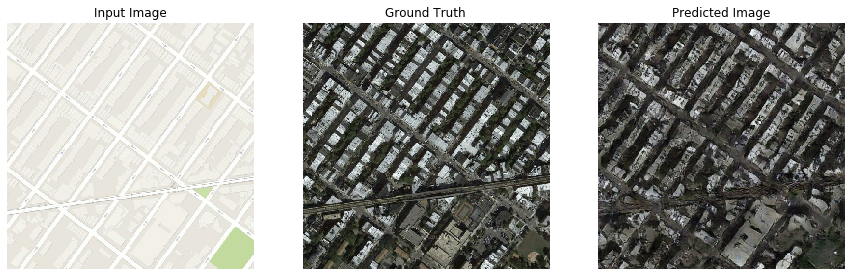

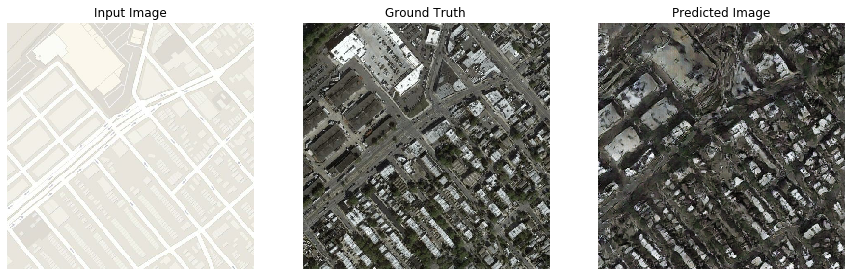

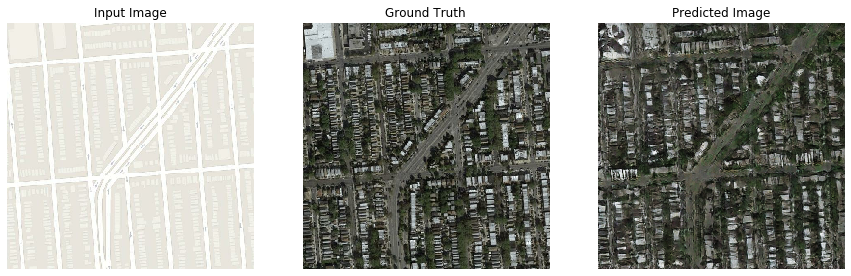

In [ ]:
for _input, _target in test_dataset.take(5):
    generate_images(generator, _input, _target)